# DiuSST paper - Fig. 5
Code to reproduce Fig. 5 of https://arxiv.org/abs/2205.07933

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.ndimage import gaussian_filter1d
import xarray as xr

In [2]:
data = xr.load_dataset('../../input_data/moce5/moce5_dataset.cdf', decode_timedelta=False)

_diusst = np.load("../../output_files/simu_diusst.npz")
_zb05 = np.load("../../output_files/simu_zb05.npz")
_slab = np.load("../../output_files/simu_slab.npz")
_const = np.load("../../output_files/simu_const.npz")

_data = {}
for i, container in enumerate([_diusst, _zb05, _slab, _const]):
    _data[i] = [container[key] for key in container]

simu_diusst, simu_zb05, simu_slab, simu_const = [_data[i] for i in range(4)]

T_f = float(data.T_f)
ref_idx = 20
dsst_diusst = simu_diusst[0][:,0] - simu_diusst[0][:,ref_idx]
dsst_zb05 = simu_zb05[0]

print('Reference depth: {:.3f} m'.format(simu_diusst[2][ref_idx]))

Reference depth: -3.045 m


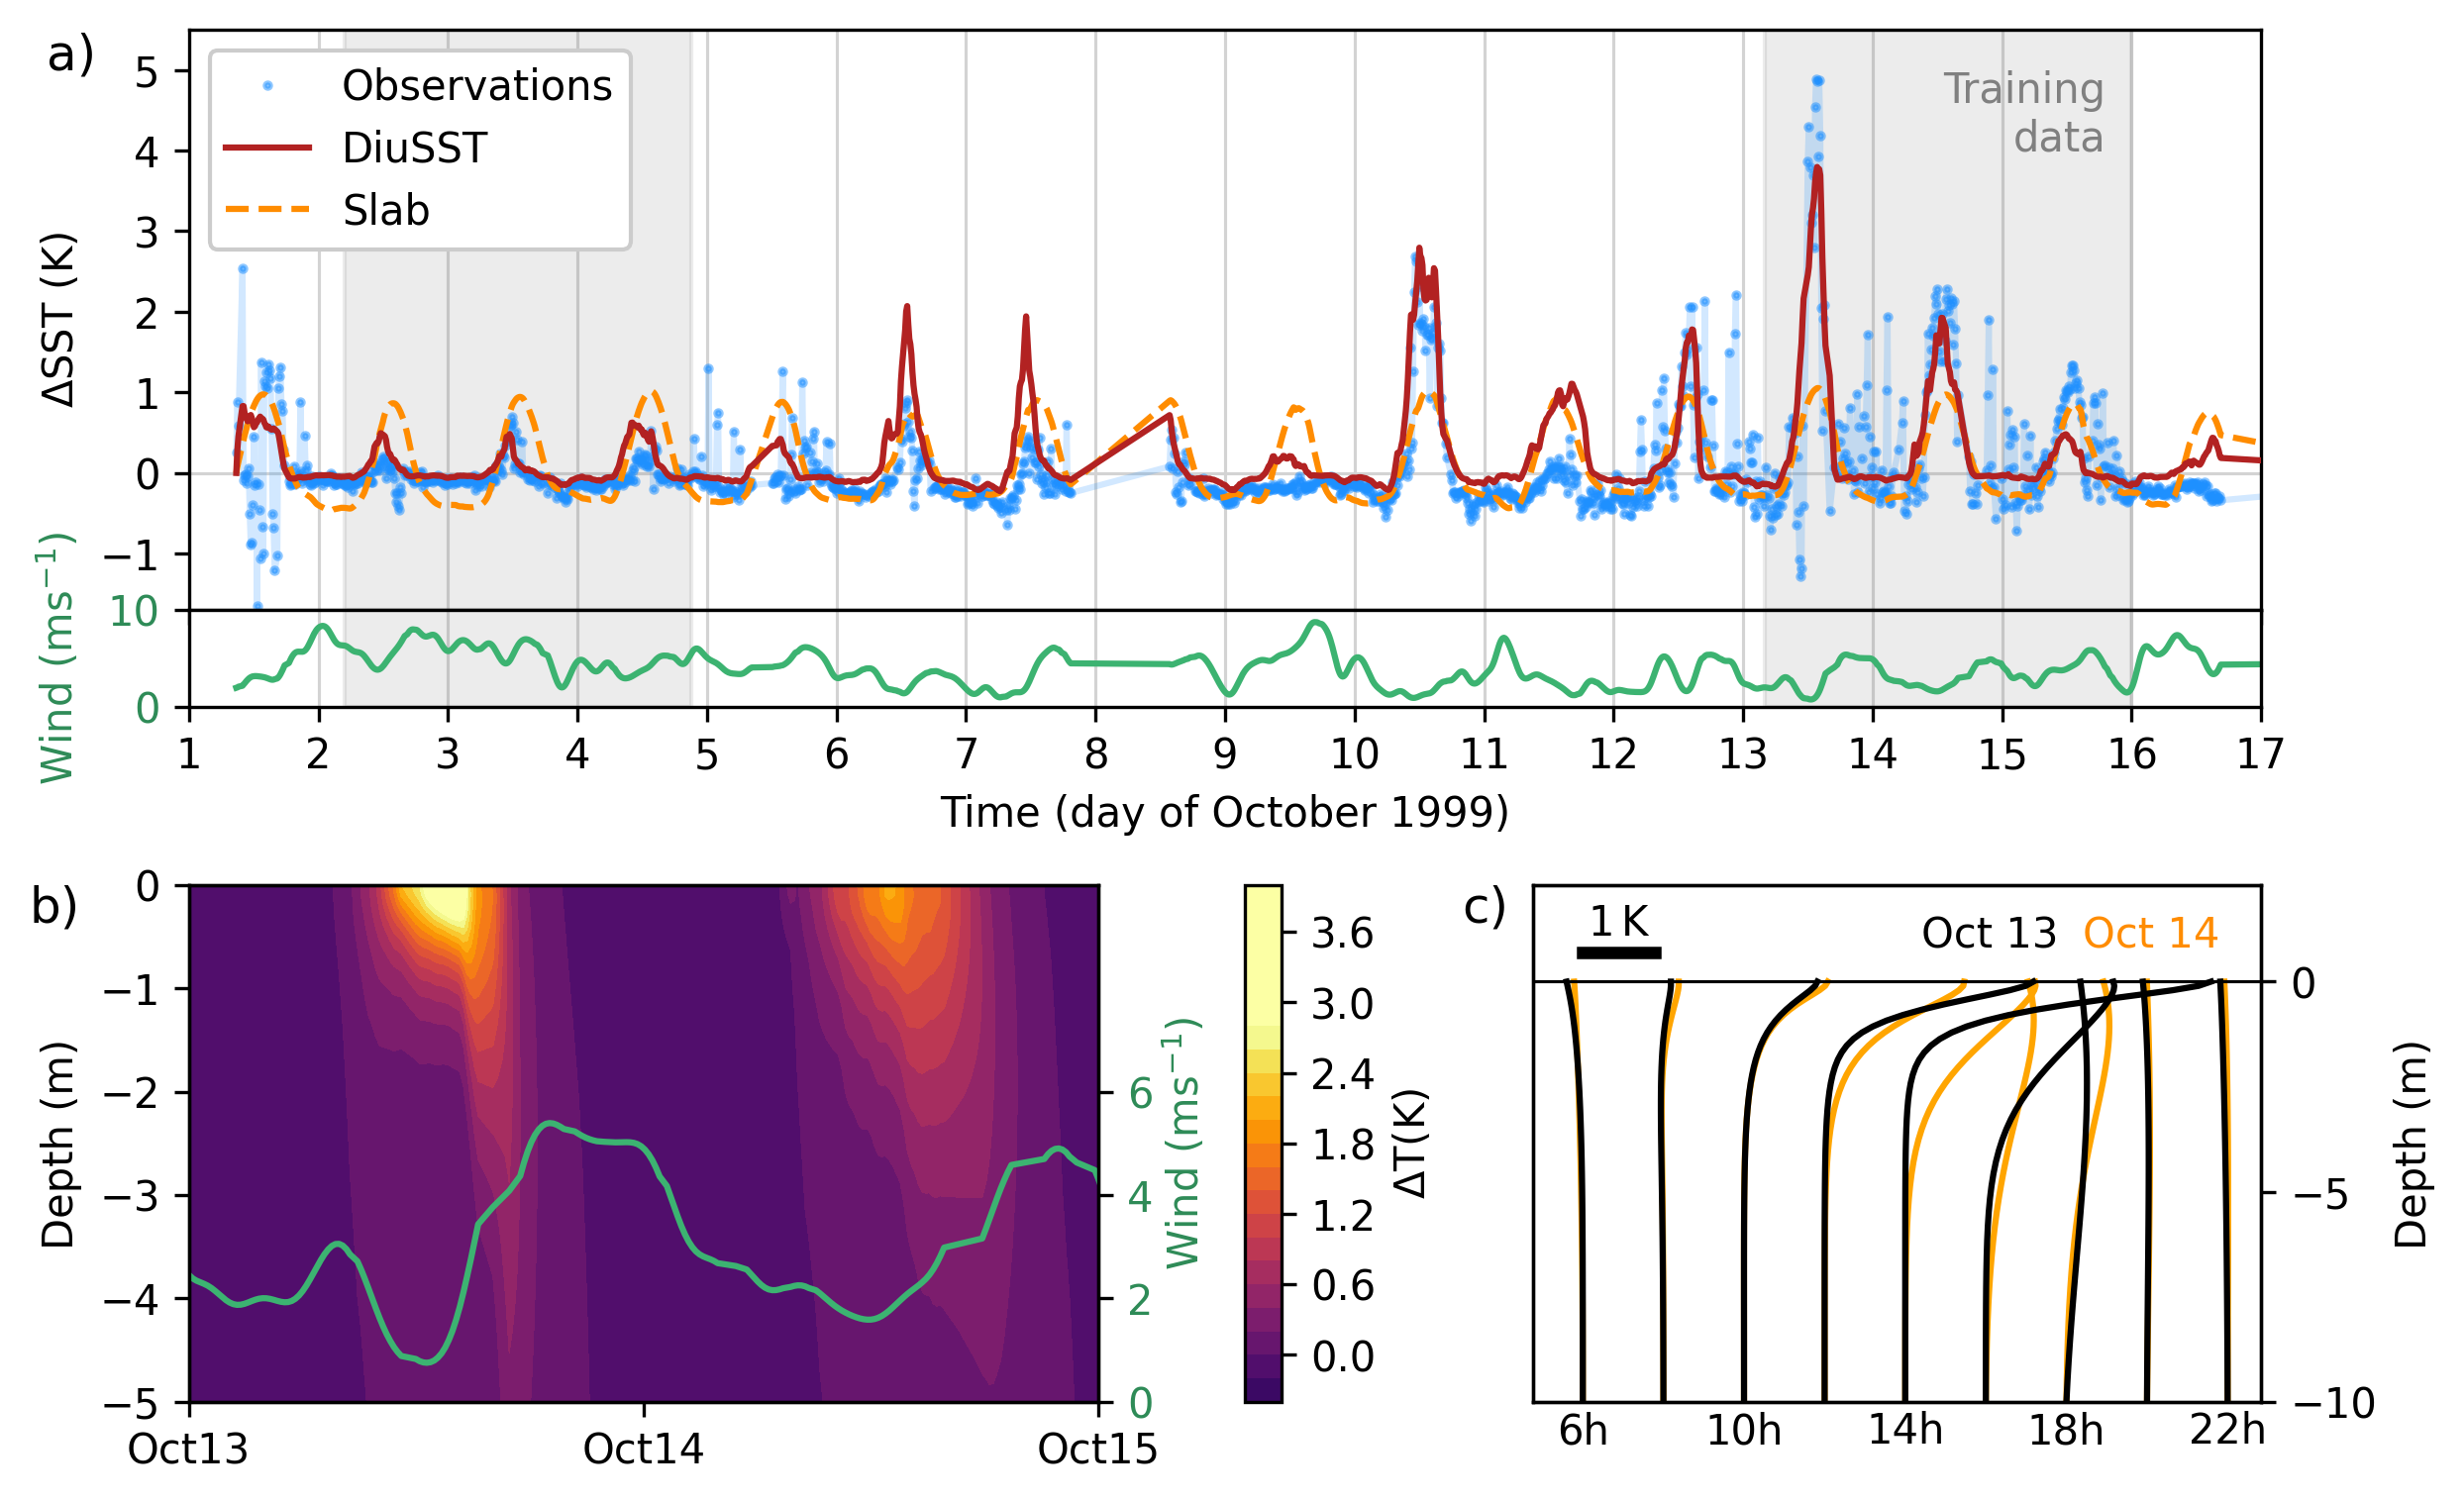

In [3]:
shift = 1

fig = plt.figure(dpi=300,figsize=(9,6))
gs1 = GridSpec(2, 1, height_ratios=[3,.5], wspace=0, hspace=0,bottom=.5)
gs2 = GridSpec(1,5,width_ratios=[2.5,.01,.1,.3,2],top=.4,hspace=2)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])
axcb = fig.add_subplot(gs2[2])
ax3 = fig.add_subplot(gs2[0])
ax3b = ax3.twinx()
ax4 = fig.add_subplot(gs2[4])

ax1.plot(data['time_day'],data['dsst'],alpha=0.2,c='dodgerblue')
ax1.plot(data['time_day'],data['dsst'],'.',markersize=3,alpha=0.5,c='dodgerblue', label='Observations')
ax1.plot(data['time_day'][:-1],dsst_diusst,c='firebrick', label='DiuSST', zorder=10)
ax1.plot(data['time_day'][:-1], simu_slab[0]-T_f, c='darkorange', label='Slab', zorder=9, ls="--")
#ax1.plot(data['time_day'][:-1],dsst_zb05,c='navy', label='ZB05', ls='--')
ax1.axhline(y=0,c='lightgray',zorder=0,lw=0.75)
ax1.legend(framealpha=1,loc='upper left')
ax1.set(xticklabels=[],yticks=[-1,0,1,2,3,4,5])
ax2.set(xlim=(0,20.5),xticks=np.arange(0,21),xticklabels=np.arange(0,21)+1)
ax1.set_ylim(-1.7,5.5)
ax1.set_xlim(0,16)
ax1.set(ylabel='$\Delta$SST (K)')
ax2.set(yticks=[0,10])
ax2.set_yticklabels(['0','10'],color='seagreen')
ax1.text(14.8,4,'Training\ndata',c='gray',ha='right')

smooth = gaussian_filter1d((data['dsst'])[1:],sigma=3)
ax2.plot(data['time_day'],gaussian_filter1d(data['wind'],sigma=5),c='mediumseagreen')
ax2.set(xlim=(0,16),ylim=(0,10))
ax2.set(xlabel='Time (day of October 1999)')
ax2.set_ylabel('Wind (ms$^{-1}$)',color='seagreen')

idxstart = np.where(data['time_day']>=12)[0][0]
idxend = np.where(data['time_day']>=14)[0][0]
heatmap = ax3.contourf(data['time_day'][idxstart:idxend],simu_diusst[2],(simu_diusst[0].T)[:,idxstart:idxend]-T_f,cmap='inferno',levels=20,vmin=-1,vmax=2.8)
ax3b.plot(data['time_day'],gaussian_filter1d(data['wind'],sigma=5),c='mediumseagreen')
ax3b.set(ylim=(0,10),yticks=[0,2,4,6])
ax3b.set_yticklabels([0,2,4,6],color='seagreen')
ax3b.yaxis.set_label_coords(1.07,0)
ax3.set(xticks=np.arange(0,21),xticklabels=np.arange(0,21)+1)
ax3.set(xlim=(12,14),ylim=(-5,0))
plt.colorbar(heatmap,cax=axcb,label=r'$\Delta$T(K)')

snaps = 12 + np.arange(6/24,1,1/12)
labels = ['6h','10h','14h','18h','22h']
for i in range(len(snaps)):
    idxtemp = np.where(data['time_day']>=snaps[i])[0][0]
    ax4.plot(simu_diusst[0][idxtemp]-T_f+shift*i,simu_diusst[2],c='k',zorder=10)
    idxtemp = np.where(data['time_day']>=snaps[i]+1)[0][0]
    ax4.plot(simu_diusst[0][idxtemp]-T_f+shift*i,simu_diusst[2],c='orange')
    if i%2==0:
        ax4.text(shift*i,-11,labels[int(i/2)],ha='center')
ax4.plot([0,.9],[.7,.7],'k',lw=3)
ax4.text(0.45,1.1,r'$1\, $K',ha='center')

ax4.set(xticks=[],ylim=(-10,2.3),yticks=[])
ax4b = ax4.twinx()
ax4b.set(xticks=[],ylim=(-10,2.3))
ax4b.set(ylabel='Depth (m)')
ax4b.set(yticks=[-10,-5,0])

ax3.set(ylabel='Depth (m)', xticks=[12,13,14],xticklabels=['Oct13', 'Oct14', 'Oct15'])
ax3b.set_ylabel('Wind (ms$^{-1}$)',color='seagreen')

ax4.text(4.2,.8,'Oct 13',c='k')
ax4.text(6.2,.8,'Oct 14',c='darkorange')
ax4.axhline(y=0,c='k',lw=0.75)

ax1.axvspan(data['time'][1290]/86400,data['time'][1585]/86400,color='gray',alpha=.15)
ax1.axvspan(data['time'][96]/86400,data['time'][413]/86400,color='gray',alpha=.15)
ax2.axvspan(data['time'][1290]/86400,data['time'][1585]/86400,color='gray',alpha=.15)
ax2.axvspan(data['time'][96]/86400,data['time'][413]/86400,color='gray',alpha=.15)
xx = np.arange(1,16)
for i in range(len(xx)):
    ax1.axvline(x=xx[i],c='lightgray',lw=.75,zorder=0)
    ax2.axvline(x=xx[i],c='lightgray',lw=.75,zorder=0)

ax1.text(-1.1,5,'a)',fontsize=12)
ax3.text(11.65,0,'b)',va='top',fontsize=12)
ax3.text(14.8,0,'c)',va='top',fontsize=12)
    
fig.align_labels()

#plt.savefig('../../scripts/figs/fig5_poster.png', bbox_inches='tight')

plt.show()